## Han Nguyen
### CSC 527 - Homework 4

In [1]:
from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pylab import *

In [2]:
def moon(num_points, distance, radius, width):
    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])

In [3]:
def signumFunction(x, w):
    activation = 0
    for i in range(3):
        activation = activation + x[i] * w[i]
    return 1 if activation >= 0 else -1

In [4]:
def updateWeight(dt, label, lamda):
    I = np.identity(3)
    trans_dt = dt.transpose()
    R = trans_dt.dot(dt)
    R = np.reshape(R, (3, 3))
    weights = (np.linalg.inv(R + (lamda * I))).dot((trans_dt.dot(label)))
    
    return weights

In [5]:
def MSE(dt, weights, label):
    MSE = 0
    for i in range(len(dt)):
        error = abs(signumFunction(dt[i], weights) - label[i])
        MSE += error ** 2
    return MSE / len(dt)

In [6]:
def boundary(w, dt):
    x = np.asarray([-20,32])
    y = -(w[0] + x*w[1])/w[2]
    
    plt.plot(x, y, 'black')

In [7]:
def results(weights, dt):
    C1 = dt[:, 1] * weights[1] + dt[:, 2] * weights[2] >= -weights[0]
    C1_dt = dt[C1]
    C2 = dt[:, 1] * weights[1] + dt[:, 2] * weights[2] < -weights[0]
    C2_dt = dt[C2]

    x = np.asarray([-20, 32])
    y = (-weights[0] - weights[1] * x) / weights[2]
    plt.plot(x, y, c="k")

    plt.xlim(-20, 32)
    plt.title('Least Squares classification of the double-moon')
    plt.scatter(C1_dt[:, 1], C1_dt[:, 2], c="b", marker='x', s=20)
    plt.scatter(C2_dt[:, 1], C2_dt[:, 2], c="r", marker='x', s=20)
    plt.savefig("Least Squares classification of the double-moon.png")
    plt.show()

Please enter the distances between 2 moon: -4
MSE:  [0.512]


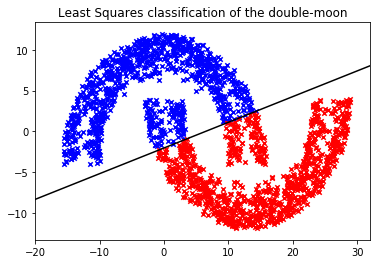

In [8]:
if __name__ == "__main__":
    lamda = 0.1
    
    distance = int(input("Please enter the distances between 2 moon: "));
    x1, x2, y1, y2 = moon(1000, distance, 10, 6)
    dt = []
    dt.extend([x1[i], y1[i],  1] for i in range(1000))
    dt.extend([x2[i], y2[i], -1] for i in range(1000))
    dt = np.asarray(dt)
    
    matrix = dt
    trans_matrix = matrix.T

    ones = np.ones(1000)
    minus_ones = np.ones(1000)*-1
    label = np.concatenate((ones, minus_ones)).reshape((1000*2, 1))
    corr_matrix = trans_matrix.dot(matrix)
    corr_matrix = np.reshape(corr_matrix, (3,3))
    x = x1 + x2
    x = np.asarray(x).reshape(1000*2,1)
    y = y1 + y2
    y = np.asarray(y).reshape(1000*2,1)
    x0 = np.ones((1000*2,1))
    classified_dt = np.concatenate([x0, x, y],axis=1)


    weights = updateWeight(classified_dt, label, lamda)
    MSE = MSE(classified_dt, weights, label)
    print("MSE: ", MSE)
  
    results(weights, classified_dt)
